# Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Read Data

In [43]:
df = pd.read_csv('phisingData.csv')

In [44]:
df.shape

(11055, 31)

In [45]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

# Check Missing Values

In [47]:
df.isna().sum().sum()

np.int64(0)

# Check Duplicates

In [48]:
df.duplicated().sum()

np.int64(5206)

In [49]:
df.drop_duplicates(inplace=True)

# Target Distribution

In [59]:
df["Result"].value_counts()

,count
Result,
-1,3019
1,2830


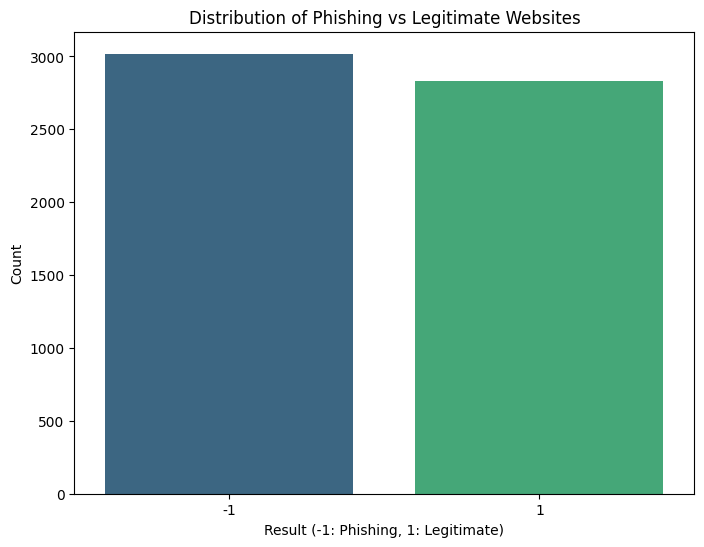

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df, palette='viridis')
plt.title('Distribution of Phishing vs Legitimate Websites')
plt.xlabel('Result (-1: Phishing, 1: Legitimate)')
plt.ylabel('Count')
plt.show()

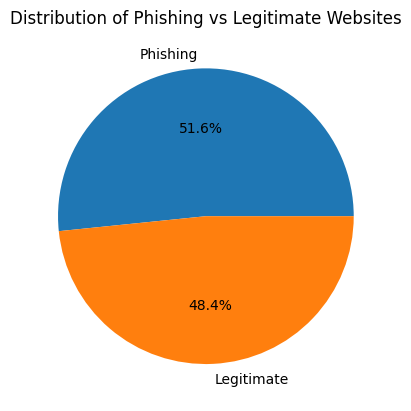

In [58]:
plt.pie(df['Result'].value_counts(), labels=['Phishing', 'Legitimate'], autopct='%1.1f%%')
plt.title('Distribution of Phishing vs Legitimate Websites')
plt.show()

# Features Correlation Heatmap


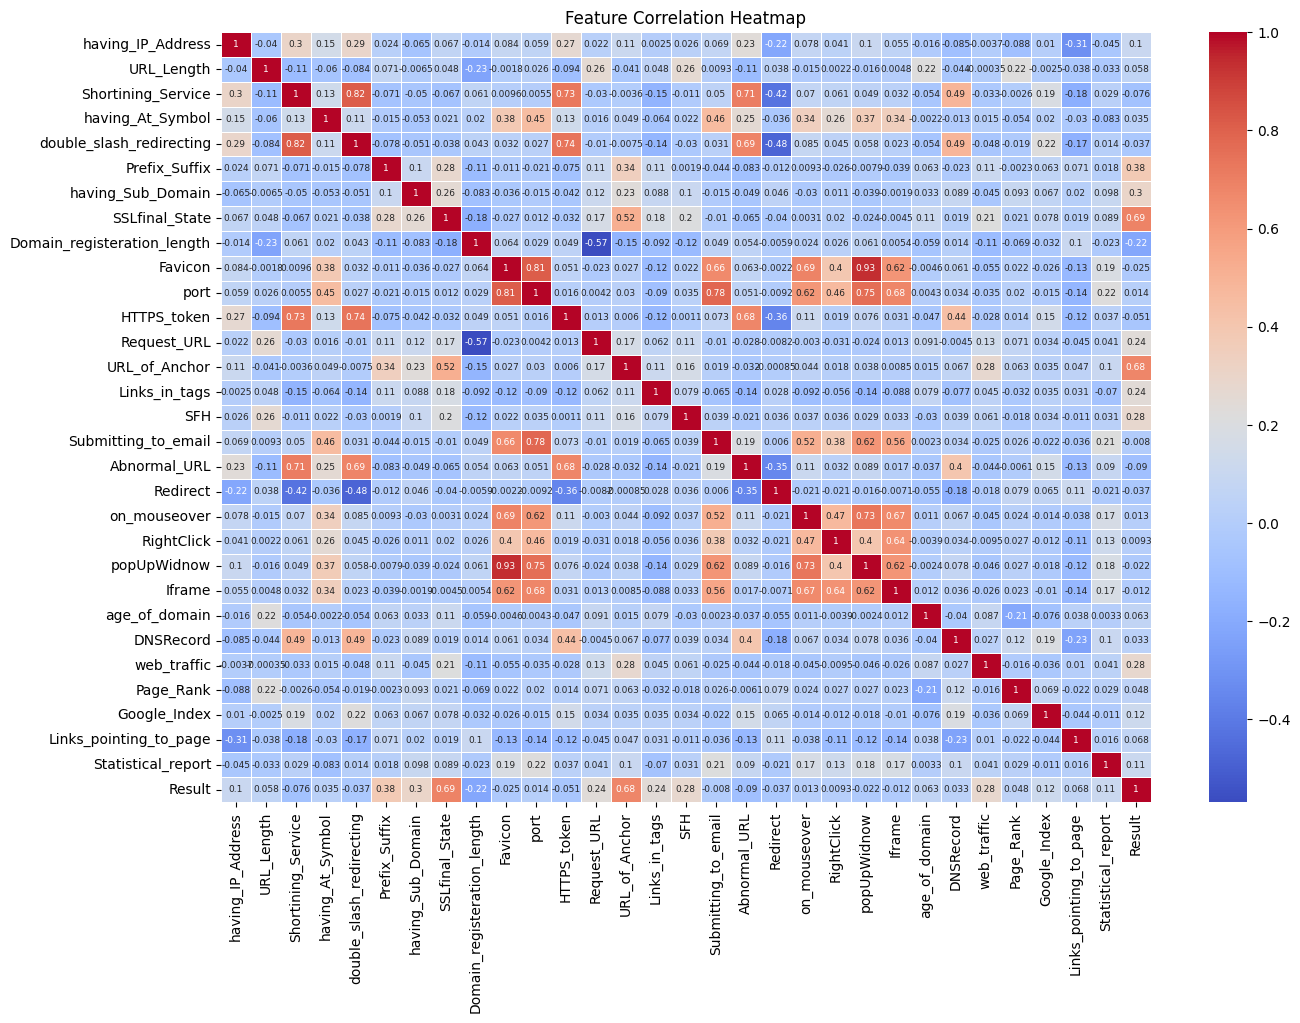

In [51]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,annot_kws={'size':6.5})
plt.title('Feature Correlation Heatmap')
plt.show()

### Feature Correlation With Result (Phishing vs Legitimate)

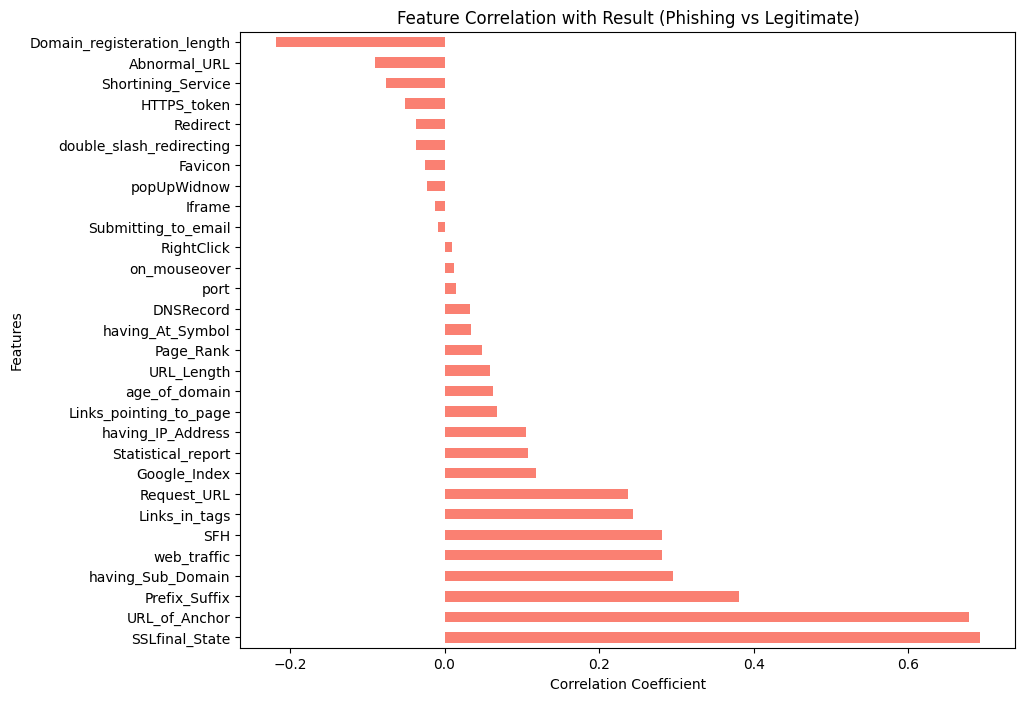

In [52]:
target_corr = df.corr()['Result'].sort_values(ascending=False).drop('Result')

plt.figure(figsize=(10, 8))
target_corr.plot(kind='barh', color='salmon')
plt.title('Feature Correlation with Result (Phishing vs Legitimate)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# SSL Certificate State

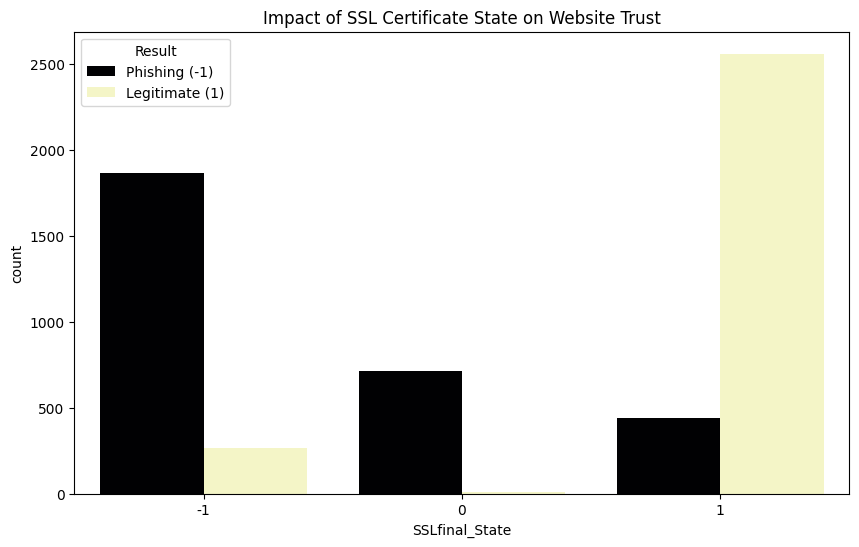

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SSLfinal_State', hue='Result', data=df, palette='magma')
plt.title('Impact of SSL Certificate State on Website Trust')
plt.legend(title='Result', labels=['Phishing (-1)', 'Legitimate (1)'])
plt.show()

# Precence Of Hyphen

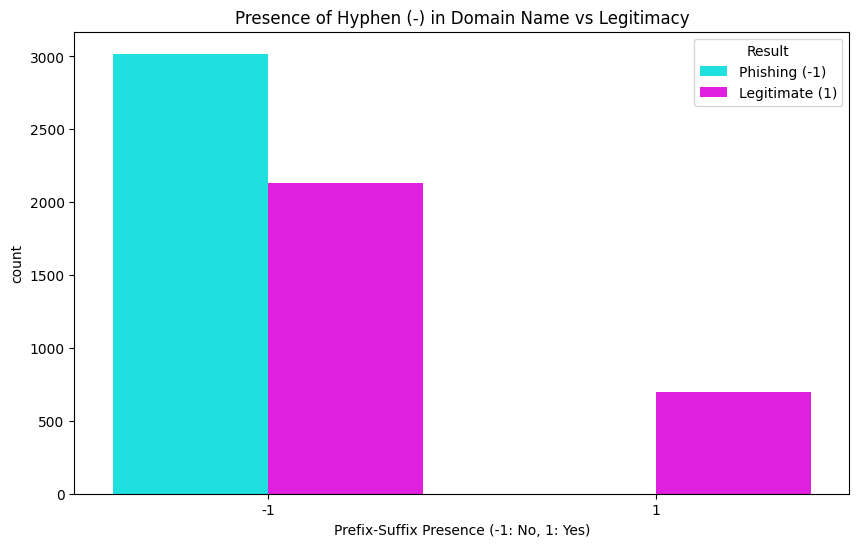

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Prefix_Suffix', hue='Result', data=df, palette='cool')
plt.title('Presence of Hyphen (-) in Domain Name vs Legitimacy')
plt.xlabel('Prefix-Suffix Presence (-1: No, 1: Yes)')
plt.legend(title='Result', labels=['Phishing (-1)', 'Legitimate (1)'])
plt.show()

# Web Traffic Distribution

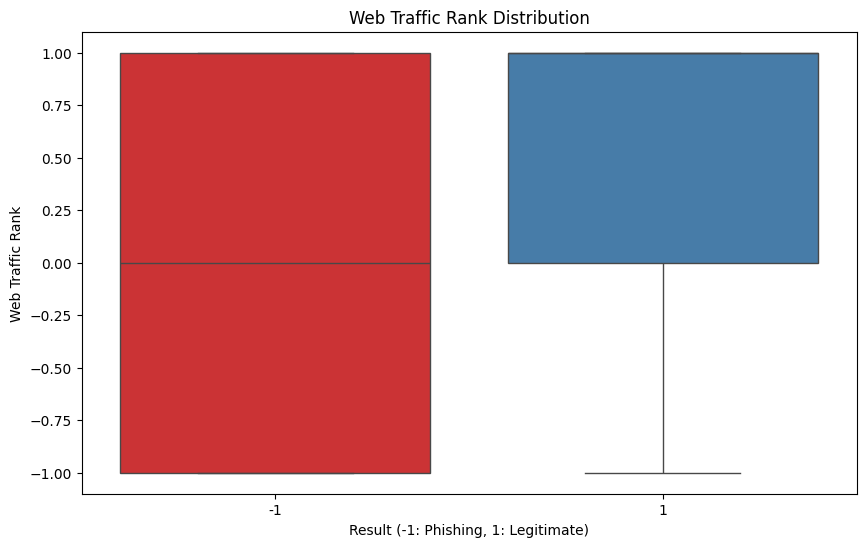

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='web_traffic', data=df, palette='Set1')
plt.title('Web Traffic Rank Distribution')
plt.xlabel('Result (-1: Phishing, 1: Legitimate)')
plt.ylabel('Web Traffic Rank')
plt.show()

# 📊 Summary of EDA Findings

After analyzing the Phishing Dataset, here are the key takeaways:

1.  **Data Quality:**
    * The dataset contained **~50% duplicate rows**, which were removed to ensure the model generalizes well on unseen data.
    * The classes (Phishing vs Legitimate) are **well-balanced**, eliminating the need for oversampling techniques.

2.  **Top Predictors (Features):**
    * **SSL Certificate (`SSLfinal_State`):** The strongest indicator. Legitimate websites almost always have valid SSL, while phishing sites do not.
    * **Web Traffic:** Legitimate sites tend to have higher traffic ranks compared to short-lived phishing sites.

3.  **Weak Features:**
    * **URL Length:** Showed very weak correlation (~0.05) and similar distributions for both classes, suggesting it has low predictive power in this specific dataset.

